In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms_2.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903,
       2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914,
       2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925,
       2926, 2927, 2928, 2929]), array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32]))
-11.528838507442742


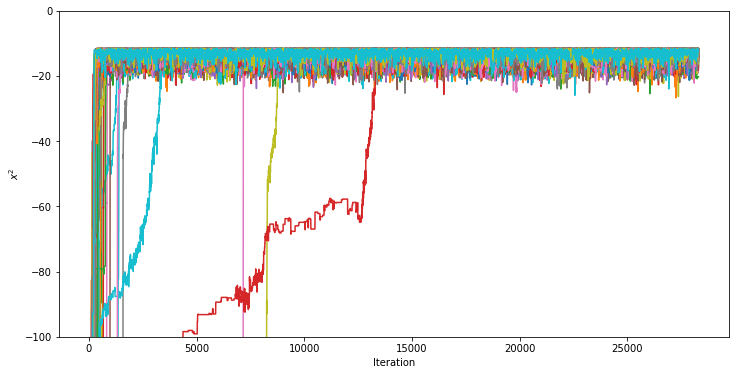

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

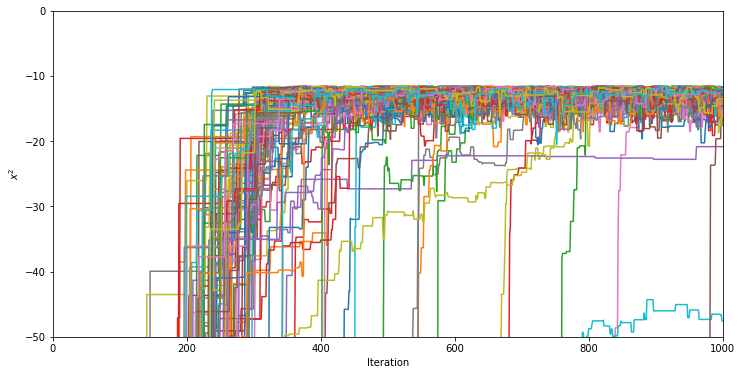

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([5922., 5875., 5997., 5895., 5966., 6034., 5957., 5888., 5879.,
       5896., 5941., 5807., 5770., 5963.,  263., 5883., 5910., 5893.,
       5877., 5770., 5994., 6003., 5810., 5764., 5666., 5990., 5831.,
       5907., 5929., 5901., 5956., 5838., 5864., 5764., 5839., 5866.,
       6024., 5833., 5939., 5739., 5804., 5808., 6009., 5841., 5903.,
       5738., 4734., 5865., 4435., 5825., 5853., 5855., 5861., 5842.,
       5971., 5810., 5836., 5720., 5784., 5865., 5786., 5803., 5849.,
       6036., 5746., 6017., 5898.,  618., 6045., 5893., 5957., 5846.,
       5897., 3842., 5839., 5898., 5970., 6012., 5833., 5897., 5909.,
       5861., 5913., 5867., 5921., 5901., 5919., 5871., 5923., 5931.,
       5963., 5850., 5886., 5844., 5965., 5776., 5960., 5903., 5808.,
       6010.,  170., 5766., 5898., 5802., 5923., 5944., 5856., 5919.,
       5792., 5984., 5865., 6004.,  215., 5932., 6027., 5976., 5846.,
       5896., 5743., 5863.])

[ 52.41958542 255.92341411 213.39910673  36.72451541]
flat chain shape: (240, 4)
flat log prob shape: (240,)


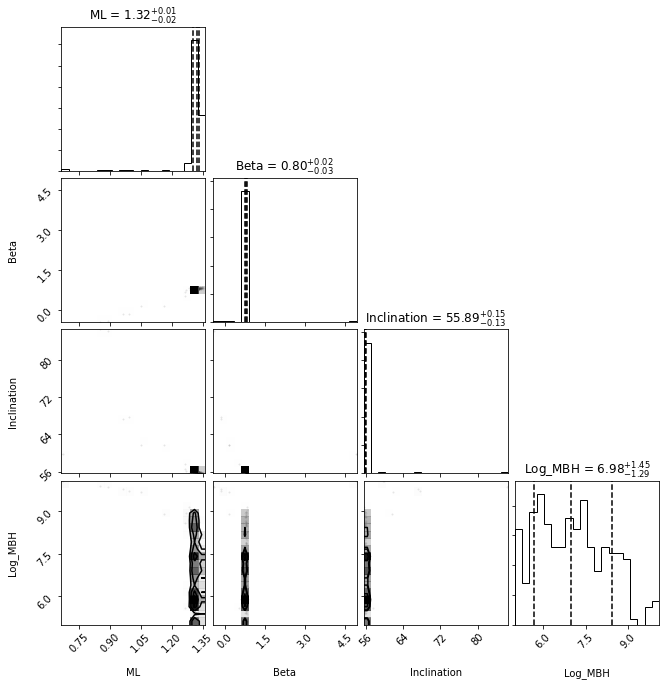

In [8]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=5000, flat=True, thin=8000 )
log_prob_samples = read.get_log_prob(discard=5000,flat=True, thin=8000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

511 127
flat chain shape: (26160, 4)
flat log prob shape: (26160,)


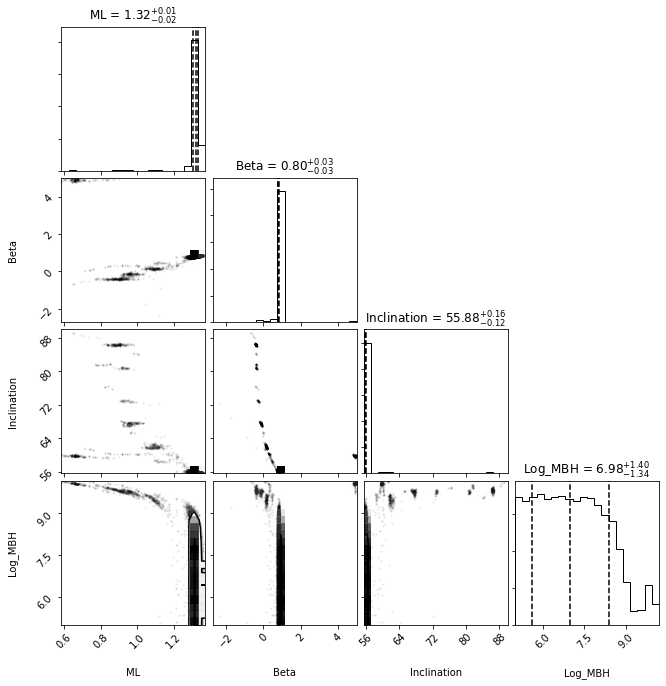

In [9]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [10]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
tau = read.get_autocorr_time()
tau

array([ 52.41958542, 255.92341411, 213.39910673,  36.72451541])

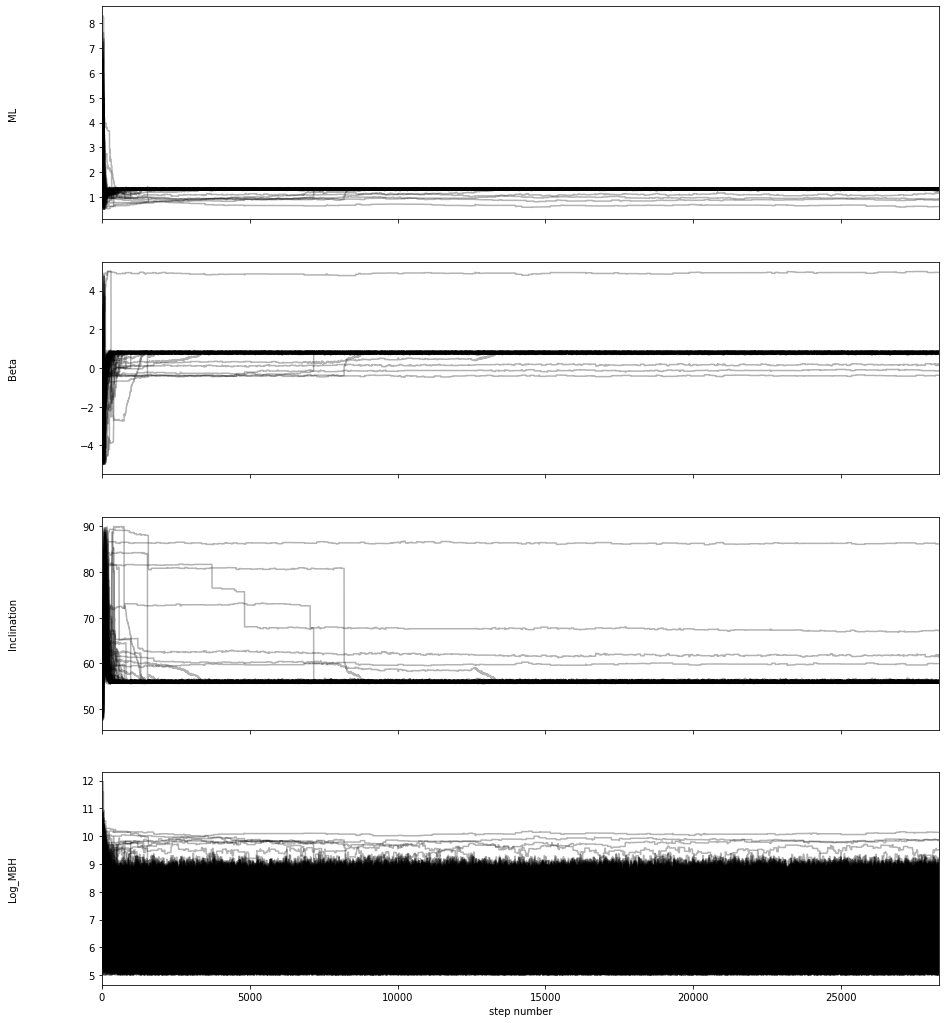

In [12]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [13]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

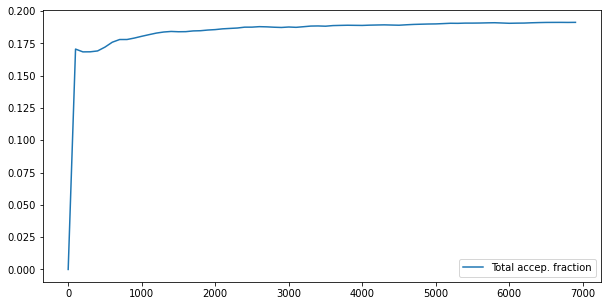

In [14]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

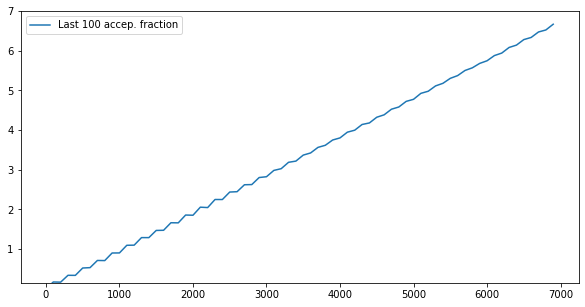

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [16]:
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class

In [30]:
xbin, ybin, goodbins, rms      = np.loadtxt("vrm.txt", unpack=True)   #dynamical data
surf_lum, sigma_lum, qobs_lum  = np.loadtxt("mge.txt", unpack=True)   #mge decomposition

goodbins = goodbins == 1
sigmapsf = np.array([0.6, 1.2])
normpsf  = np.array([0.7, 0.3])
pixsize  = 0.8

In [31]:
#Best fit

best_ml      = 1.319
best_beta    = np.full_like(surf_lum, 0.801)
best_inc     = 55.883
best_log_mbh = 6.975

jam_axi_rms elapsed time sec: 0.95
inc=55.9 beta_z=0.80 M/L=1 BH=9.44e+06 chi2/DOF=0.0964
Total mass MGE: 7.385e+10


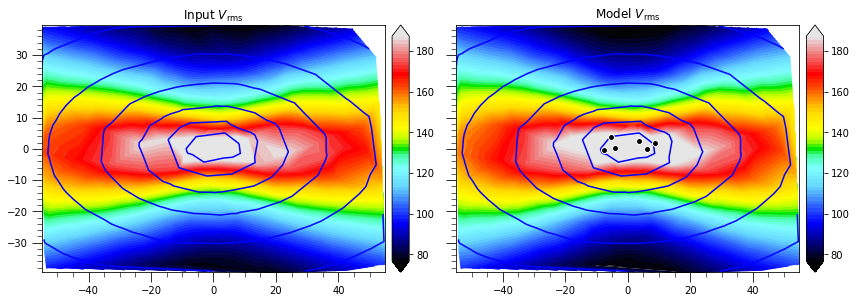

In [33]:
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= best_inc, distance=16.5, mbh=10**(best_log_mbh), rms=rms,
                    beta=best_beta, normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

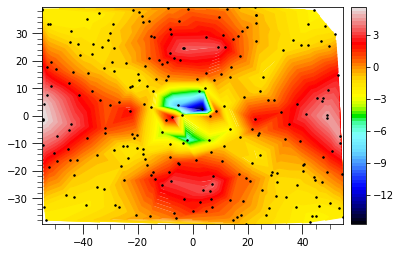

In [34]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

In [35]:
print("Chi2/DOF:",chi2)
print("Chi2 Totoal", chi2T)

Chi2/DOF: 0.09642456797862577
Chi2 Totoal 23.527594586784687
